<a href="https://colab.research.google.com/github/sallmaaramadan-ai/Advanced-Learning-Algorithms/blob/main/Week1_Neural_Networks/week1_neurons_and_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neurons and Layers – Conceptual Exploration

In this notebook, I explore how a single neuron in TensorFlow
corresponds to linear and logistic regression models.

The goal is to understand the relationship between classical ML
models and neural network implementations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [8]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

#definr layer with one neuron
linear_layer=tf.keras.layers.Dense(units=1, activation='linear',)
#try the model on one example
a1=linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.2971324]], shape=(1, 1), dtype=float32)


In [9]:
w,b=linear_layer.get_weights()
print(f"w= {w} , b= {b}")

w= [[1.2971324]] , b= [0.]


These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero

To verify that the Dense layer implements the same equation
as linear regression, we manually set the weight and bias.


In [10]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [11]:
a1=linear_layer(X_train[0].reshape(1,1))
print(a1)
alin=np.dot(X_train[0],set_w)+ set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


They produce the same values

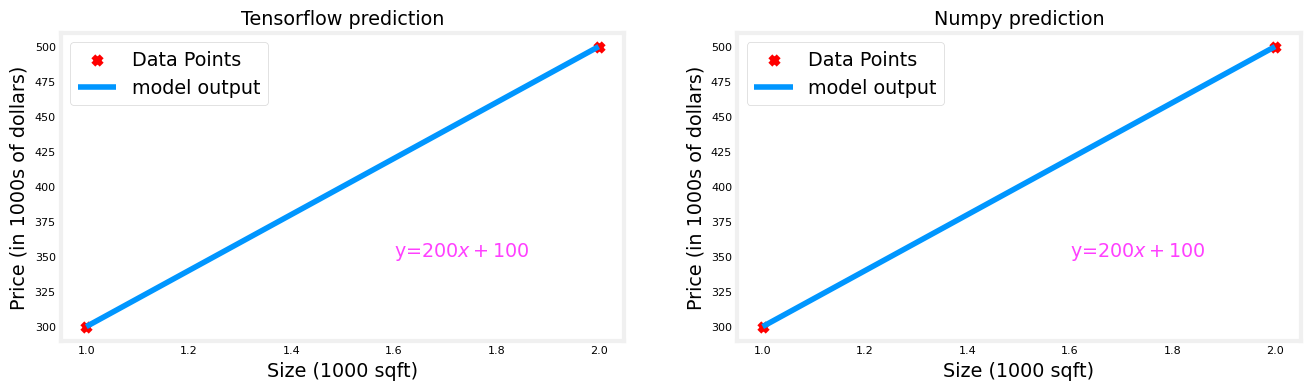

In [13]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

# Neuron with Sigmoid activation

In [14]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

In [15]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

implement a 'logistic neuron' by adding a sigmoid activation

In [18]:
model=Sequential([
    tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid',name='L1')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
logistic_layer=model.get_layer('L1')
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [22]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[[0.01098694]]
[[0.01098694]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

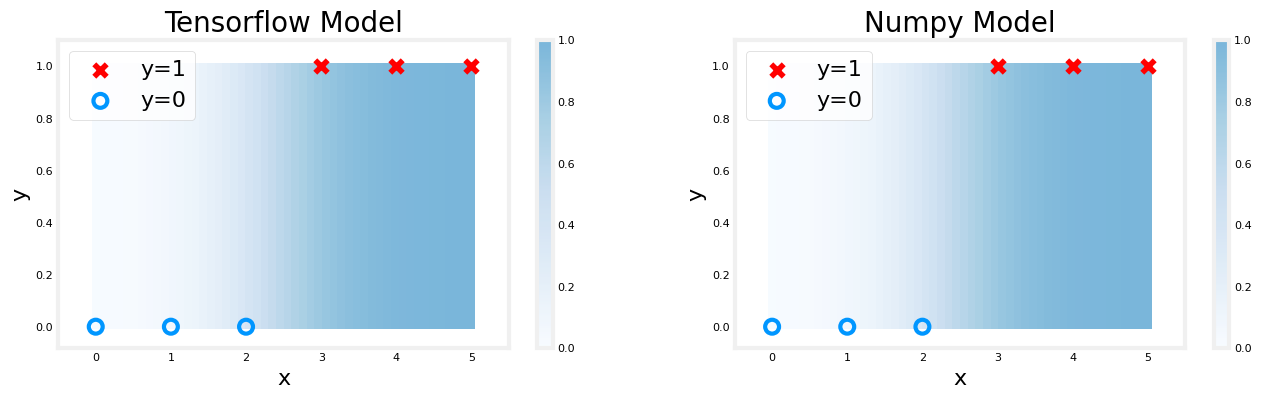

In [23]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

## Key Takeaways

- A single neuron without activation behaves exactly like linear regression.
- Adding a sigmoid activation turns the neuron into a logistic regression model.
- TensorFlow layers abstract the math but do not change the underlying model.
